# Multinomial Logistic Regression

In [1]:
# Load Data
import numpy as np
import pandas as pd

data = pd.read_csv('https://bit.ly/fish_csv_data')
data.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
# Identify all fish species in data
fish_target = data['Species'].to_numpy()
fish_input = data[['Weight','Length','Diagonal','Height','Width']].to_numpy()
print(pd.unique(data['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
# Make train data and test data
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [4]:
# Normalization and Preprocessing train data and test data
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## K-NN Algorithms

In [5]:
# Make KneighborsClassifier class object and identify train data and test data score
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


C:\Users\ekjh0\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ekjh0\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [6]:
# Identify class order
print(f'Class : {kn.classes_}')

Class : ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [7]:
# Identify 5 samples percentage in test data
test = 10
proba = kn.predict_proba(test_scaled[:test])
knn_result = np.round(proba, decimals=4)
print(knn_result)

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [1.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.3333 0.     0.6667 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]]


In [8]:
# Identify Sample4 kneighbors
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(f"Sample4 kneighbors : {train_target[indexes]}")

Sample4 kneighbors : [['Roach' 'Perch' 'Perch']]


In [9]:
knn_result = knn_result.tolist()
fish = ['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']
knn_predict = []

for pre in knn_result:
    pre_num = pre.index(max(pre))
    predict_fish = fish[pre_num]
    knn_predict.append(f"{predict_fish}({max(pre)})")
    print(f"Predict Result : {predict_fish}")

Predict Result : Perch
Predict Result : Smelt
Predict Result : Pike
Predict Result : Perch
Predict Result : Perch
Predict Result : Bream
Predict Result : Smelt
Predict Result : Roach
Predict Result : Perch
Predict Result : Pike


## Logitic Regression

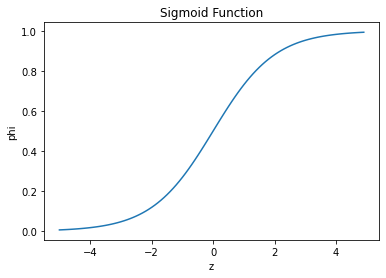

In [10]:
# Identify Sigmoid fuction reform
import numpy as np
from matplotlib import pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.title('Sigmoid Function')
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [11]:
# Binary Classification with Logistic Regression
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [12]:
# Perform multi class classificaiton with Logistic Regression and train model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=20, max_iter=1000)
# max_iter : 최대반복횟수, c : 정규화 강도의 역수(c의 값이 작을수록 더 강한 정규화 실행)
model.fit(train_scaled, train_target)

print(model.score(train_scaled, train_target))
print(model.score(test_scaled, test_target))

0.9327731092436975
0.925


In [13]:
# Identify class order
print(f'Class : {kn.classes_}')

print("\nPredict Result:")

# Identify 5 samples percentage in test data
proba = model.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

Class : ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']

Predict Result:
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [14]:
# Identify 5 samples percentage in test data
decision = model.decision_function(test_scaled[:test])
print(np.round(decision, decimals=2))

[[-6.500e+00  1.030e+00  5.160e+00 -2.730e+00  3.340e+00  3.300e-01
  -6.300e-01]
 [-1.086e+01  1.930e+00  4.770e+00 -2.400e+00  2.980e+00  7.840e+00
  -4.260e+00]
 [-4.340e+00 -6.230e+00  3.170e+00  6.490e+00  2.360e+00  2.420e+00
  -3.870e+00]
 [-6.800e-01  4.500e-01  2.650e+00 -1.190e+00  3.260e+00 -5.750e+00
   1.260e+00]
 [-6.400e+00 -1.990e+00  5.820e+00 -1.100e-01  3.500e+00 -1.100e-01
  -7.100e-01]
 [ 1.672e+01  8.350e+00 -3.340e+00 -4.900e+00  8.700e-01 -2.653e+01
   8.830e+00]
 [-1.233e+01  1.910e+00  5.760e+00 -2.900e+00  3.170e+00  8.690e+00
  -4.300e+00]
 [-2.620e+00 -8.500e-01  2.910e+00 -1.800e-01  3.600e+00 -2.880e+00
   2.000e-02]
 [-3.840e+00 -1.050e+00  4.990e+00 -9.300e-01  3.500e+00 -3.400e+00
   7.300e-01]
 [ 1.680e+00 -1.446e+01  1.050e+01  1.426e+01 -9.100e-01 -1.221e+01
   1.140e+00]]


In [15]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
logistic_result = np.round(proba, decimals=3)
print(logistic_result)

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]
 [0.999 0.    0.    0.    0.    0.    0.   ]
 [0.    0.001 0.05  0.    0.004 0.945 0.   ]
 [0.001 0.007 0.32  0.015 0.638 0.001 0.018]
 [0.    0.002 0.802 0.002 0.182 0.    0.011]
 [0.    0.    0.023 0.977 0.    0.    0.   ]]


In [16]:
logistic_result = logistic_result.tolist()
fish = ['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish']
logistic_predict = []

for pre in logistic_result:
    pre_num = pre.index(max(pre))
    predict_fish = fish[pre_num]
    logistic_predict.append(f"{predict_fish}({max(pre)})")
    print(f"Predict Result : {predict_fish}")

Predict Result : Perch
Predict Result : Smelt
Predict Result : Pike
Predict Result : Roach
Predict Result : Perch
Predict Result : Bream
Predict Result : Smelt
Predict Result : Roach
Predict Result : Perch
Predict Result : Pike


In [17]:
print("Compare predict between KNN(left) and LogisticRegression(right)\n")
for i in range(test):
    print(f'{knn_predict[i]}, {logistic_predict[i]}')

Compare predict between KNN(left) and LogisticRegression(right)

Perch(1.0), Perch(0.841)
Smelt(1.0), Smelt(0.946)
Pike(1.0), Pike(0.935)
Perch(0.6667), Roach(0.567)
Perch(0.6667), Perch(0.904)
Bream(1.0), Bream(0.999)
Smelt(1.0), Smelt(0.945)
Roach(0.6667), Roach(0.638)
Perch(0.6667), Perch(0.802)
Pike(1.0), Pike(0.977)


'KNN'과 '로지스틱 회귀'는 둘 다 예측 값이 동일하다. 하지만 데이터의 양이 많지 않기 때문에 생선 데이터에서는 KNN의 호율이 더 좋았다.